In [1]:
%%bq query 
# sql query to return total birhts by year
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


In [2]:
%%bq query --name total_births
# sql query to return total birhts by year
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

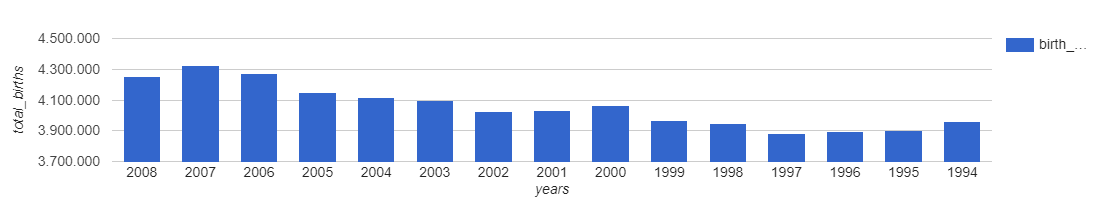

In [38]:
%%chart columns --data total_births --fields year,birth_count
hAxis:
  title: years
vAxis:
  title: total_births


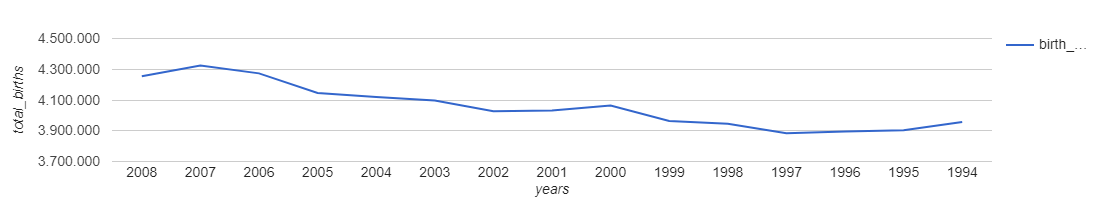

In [39]:
%%chart line --data total_births --fields year,birth_count
hAxis:
  title: years
vAxis:
  title: total_births

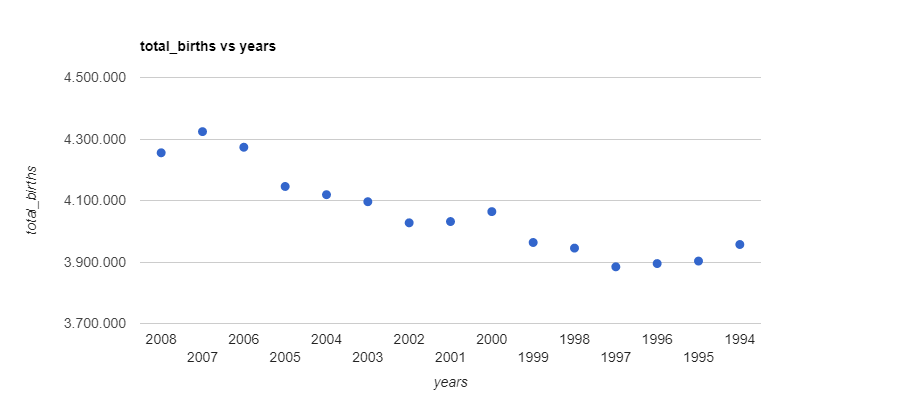

In [5]:
%%chart scatter --data total_births
title: total_births vs years
height: 400
width: 900
hAxis:
  title: years
vAxis:
  title: total_births
legend: none

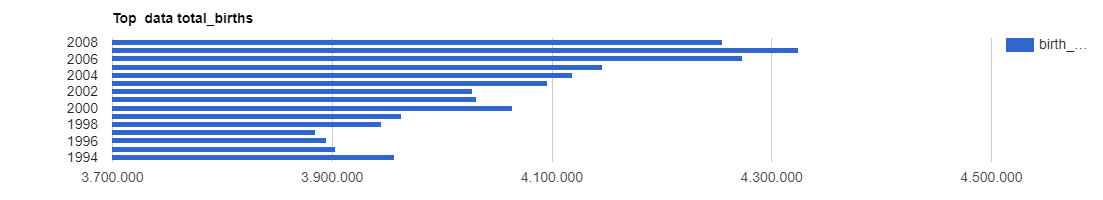

In [44]:
%%chart bars  --fields year,birth_count --data total_births
title: Top  data total_births 

  


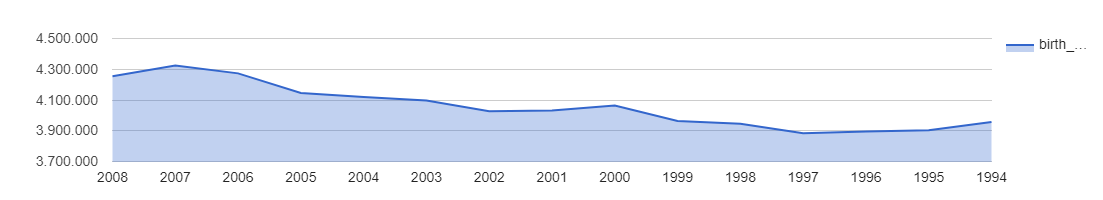

In [30]:
%%chart area  --fields year,birth_count --data total_births

In [31]:
%%chart table  --fields year,birth_count --data total_births

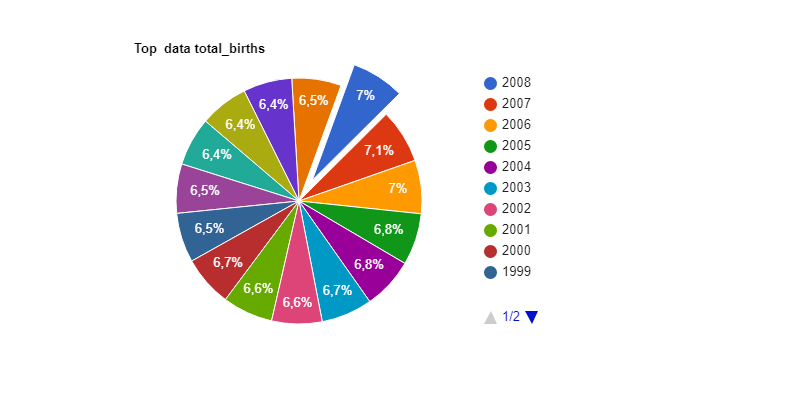

In [25]:
%%chart pie --fields year,birth_count --data total_births
title: Top  data total_births 
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2

In [8]:
query = """
select CAST(source_year AS string)AS year,COUNT(is_male)As birth_count
from `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC

"""

In [9]:
# call bigquery and examine in dataframe
import google.datalab.bigquery as bq
df=bq.Query(query+"LIMIT 15").execute().result().to_dataframe()
df.head()

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


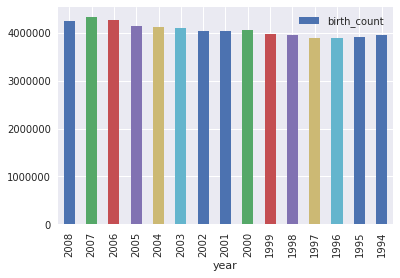

In [10]:
# BAR PLOT 

df.plot(x='year',y='birth_count',kind='bar');

In [11]:
print(df)

    year  birth_count
0   2008      4255156
1   2007      4324008
2   2006      4273225
3   2005      4145619
4   2004      4118907
5   2003      4096092
6   2002      4027376
7   2001      4031531
8   2000      4063823
9   1999      3963465
10  1998      3945192
11  1997      3884329
12  1996      3894874
13  1995      3903012
14  1994      3956925


In [12]:
print(df['year'])

0     2008
1     2007
2     2006
3     2005
4     2004
5     2003
6     2002
7     2001
8     2000
9     1999
10    1998
11    1997
12    1996
13    1995
14    1994
Name: year, dtype: object


In [13]:
 print(df.loc[0])

year              2008
birth_count    4255156
Name: 0, dtype: object


In [14]:
print(df.groupby('year').sum())

      birth_count
year             
1994      3956925
1995      3903012
1996      3894874
1997      3884329
1998      3945192
1999      3963465
2000      4063823
2001      4031531
2002      4027376
2003      4096092
2004      4118907
2005      4145619
2006      4273225
2007      4324008
2008      4255156


In [15]:
print(df.describe())

        birth_count
count  1.500000e+01
mean   4.058902e+06
std    1.422076e+05
min    3.884329e+06
25%    3.951058e+06
50%    4.031531e+06
75%    4.132263e+06
max    4.324008e+06


In [17]:
%%chart --help

usage: %%chart [-h]
               {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
               ...

Generate an inline chart using Google Charts using the data in a Table, Query,
dataframe, or list. Numerous types of charts are supported. Options for the
charts can be specified in the cell body using YAML or JSON.

positional arguments:
  {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
                        commands
    annotation          Generate a annotation chart.
    area                Generate a area chart.
    bars                Generate a bars chart.
    bubbles             Generate a bubbles chart.
    calendar            Generate a calendar chart.
    candlestick         Generate a candlestick chart.
    columns          

In [18]:
%%chart bubbles --help

usage: %%chart bubbles [-h] [-f FIELDS] -d DATA

Generate a bubbles chart.

optional arguments:
  -h, --help            show this help message and exit
  -f FIELDS, --fields FIELDS
                        The field(s) to include in the chart
  -d DATA, --data DATA  The name of the variable referencing the Table or
                        Query to chart
None
